In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
data = pd.read_csv("data.csv")
data.head()
data.drop('Unnamed: 32',axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 1. First using RandomForestClassifier

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop('diagnosis',axis=1)
Y = data.diagnosis
Y = Y.astype("category").cat.as_ordered()
Y = pd.Categorical(Y).codes

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
baseline = RandomForestClassifier(n_jobs=-1)
baseline.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [34]:
baseline.score(x_test,y_test)

0.9649122807017544

In [38]:
# Tuning the hyperparameters
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators': [100,200,300],
       'max_depth': [20,30],
       'max_features': ["auto"],
       'min_samples_leaf': [1,2,3],
       'min_samples_split': [2,4]}
model = RandomForestClassifier(n_jobs=-1,random_state=42)
tuned_model = GridSearchCV(estimator=model,
                                 param_grid=grid,
                                 cv=5,
                                 verbose=2)
tuned_model.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20

[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=auto

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [20, 30], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [39]:
tuned_model.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [40]:
from sklearn.metrics import classification_report 
y_preds = tuned_model.predict(x_test)
report = classification_report(y_test,y_preds)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [43]:
tuned_model.score(x_test,y_test)

0.9649122807017544

In [8]:
from sklearn.metrics import confusion_matrix
tuned_model = RandomForestClassifier(n_jobs=-1,
                                    max_depth=20,
                                    min_samples_leaf=2,
                                    min_samples_split=2,
                                    n_estimators=200)
tuned_model.fit(x_train,y_train)
y_preds = tuned_model.predict(x_test)
mat = confusion_matrix(y_test,y_preds)

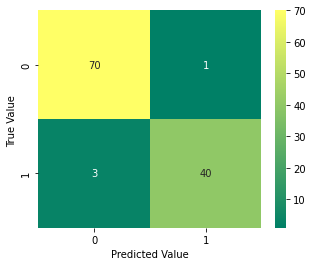

In [9]:
fig,ax=plt.subplots(figsize=(5,4))
ax = sns.heatmap(mat,annot=True,cmap='summer');
ax.set(xlabel='Predicted Value',ylabel='True Value ');

### 2. Using KMeans Clustering

In [32]:
data.diagnosis = data.diagnosis.astype("category").cat.as_ordered()
data.diagnosis = pd.Categorical(data.diagnosis).codes
data.drop('id',axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [37]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data_scaled)

KMeans(n_clusters=2)

In [34]:
data_scaled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.297676,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.297676,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1.297676,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.297676,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


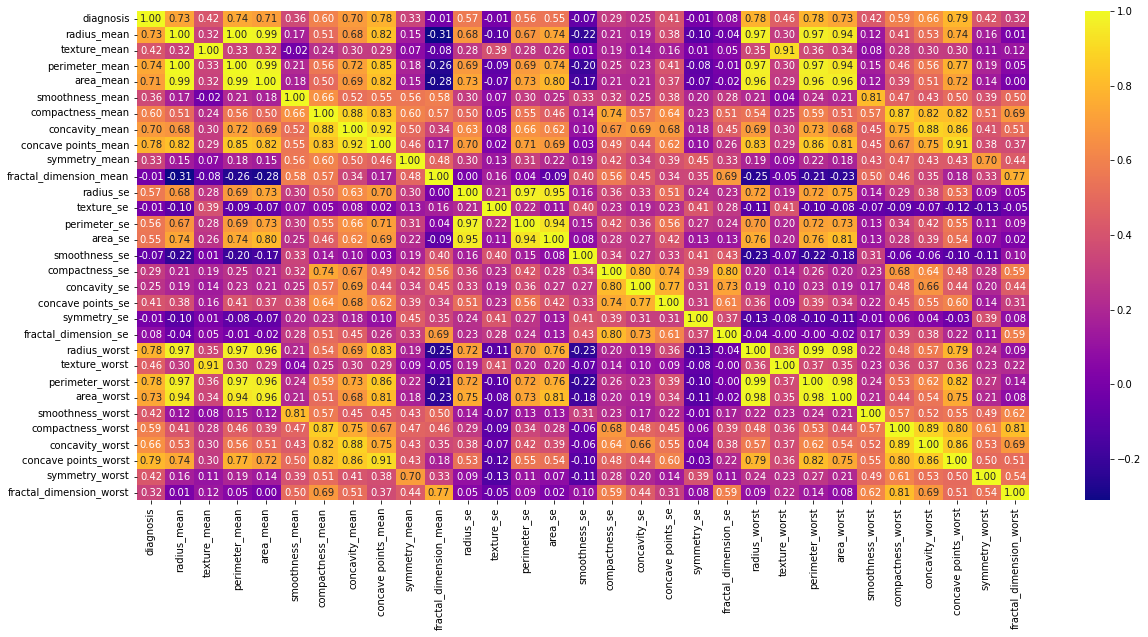

In [36]:
# Feature importance 
corr_mat = data_scaled.corr()
fig, ax = plt.subplots(figsize=(20,9))
ax = sns.heatmap(corr_mat,cmap='plasma',fmt='.2f',annot=True)

In [39]:
cluster = pd.concat([data.drop('diagnosis',axis=1),pd.Series(model.labels_,name="labels")],axis=1)

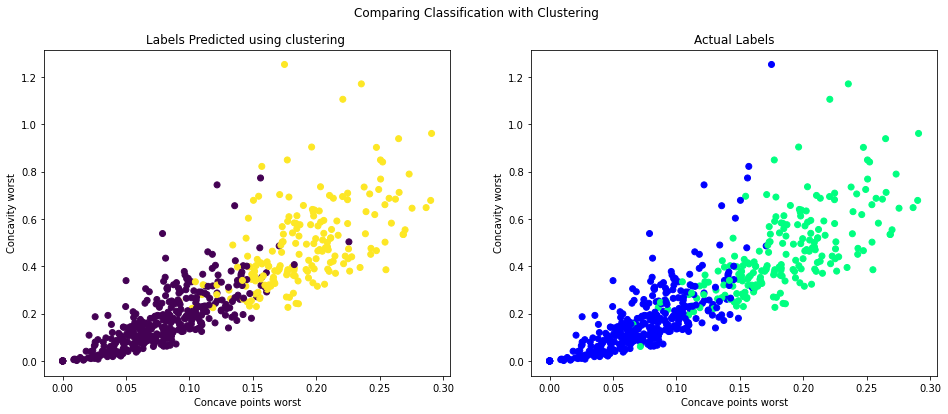

In [62]:
fig, (ax,ax1) = plt.subplots(figsize=(16,6),ncols=2)
fig.suptitle('Comparing Classification with Clustering')

ax.scatter(x=cluster['concave points_worst'],y=cluster['concavity_worst'],c=cluster.labels);
ax.set(xlabel='Concave points worst',ylabel='Concavity worst',title='Labels Predicted using clustering ');

ax1.scatter(x=data['concave points_worst'],y=data['concavity_worst'],c=data.diagnosis,cmap='winter');
ax1.set(xlabel='Concave points worst',ylabel='Concavity worst',title='Actual Labels');


[]